<a href="https://colab.research.google.com/github/nestorm94/SIS_COMP_2023_1/blob/main/Taller_Redes_Robustas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div> 
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Joaquin Fernando Sanchez Cifuentes
<br>
<i><b>Asignatura:</b></i> Sistemas Complejos 
<br>
<i><b>Estudiante:</b></i> Nestor Morales.
<br>
<i><b>Estudiante:</b></i>Maria paula  Parra
<br>
<i><b>Estudiante:</b></i> Raul Perez
<br>
<i><b>Estudiante:</b></i> Ruben Camargo 
<br>
<i><b>Tema:</b></i> Taller Redes Robustas
<br>
<br>
17/05/2023
<br>
</FONT>
</div>

In [1]:
!pip install networkx
!pip install odfpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160672 sha256=9fab1f617ce3b21a9bc1a62d0ee17e1577a8c95adc4fa45b6348e92e8a94c9e8
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [2]:
import networkx as nx
%matplotlib inline
import pandas as pd

# **Primera ciudad: Chicago**

In [3]:
dfChicago = pd.read_excel('ChicagoSketch_net1.xlsx', sheet_name='ChicagoSketch_net')
dfChicago.head()

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,;
0,1,547,49500,0.86267,0.0,0.15,4,0,0,3,;
1,2,548,49500,0.86267,0.0,0.15,4,0,0,3,;
2,3,549,49500,0.86267,0.0,0.15,4,0,0,3,;
3,4,550,49500,0.86267,0.0,0.15,4,0,0,3,;
4,5,551,49500,0.86267,0.0,0.15,4,0,0,3,;


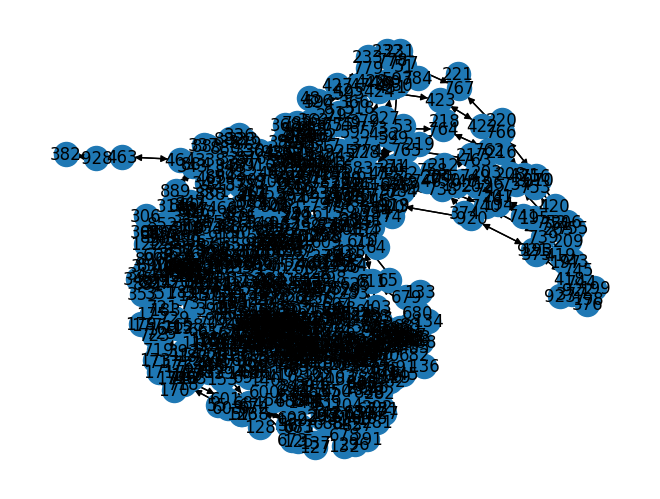

In [5]:
list_Int_nodeChicago = dfChicago['init_node'].tolist()  # lista de nodos iniciales
list_Ter_nodeChicago = dfChicago['term_node'].tolist()  # lista de nodos finales
list_weightChicago = dfChicago['length'].tolist()  # lista de pesos de los arcos
# los pesos sirven para calcular el coste de los arcos, es decir, el coste de pasar de un nodo a otro, para poder calcular el coste total de una ruta

list_edgeChicago = []  # lista de arcos
for i in range(len(list_Int_nodeChicago)):  # recorremos la lista de nodos iniciales
    varChicago = (list_Int_nodeChicago[i], list_Ter_nodeChicago[i])  # creamos una tupla con los nodos iniciales y finales
    list_edgeChicago.append(varChicago)  # añadimos la tupla a la lista de arcos

GChicago = nx.DiGraph()  # creamos el grafo
GChicago.add_nodes_from(list_Int_nodeChicago)  # añadimos los nodos iniciales al grafo
for i in range(len(list_weightChicago)):  # recorremos la lista de pesos de los arcos
    GChicago.add_edges_from(list_edgeChicago, weight=list_weightChicago[i])  # añadimos los arcos al grafo

nx.draw(GChicago, with_labels=True)  # dibujamos el grafo

In [ ]:
# Calcular la centralidad de intermediación de cada nodo
betweenness_dict = nx.betweenness_centrality(GChicago)

# Ordenar los nodos por su centralidad de intermediación
sorted_nodes = sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True)

# Mostrar los 10 nodos con mayor centralidad de intermediación
for node in sorted_nodes[:500]:
    print("Nodo:", node[0], "- Centralidad de intermediación:", node[1])

In [ ]:
import matplotlib.pyplot as plt

# Calcular la distribución de grado de la red
degree_sequence = [d for n, d in GChicago.degree()]
degree_count = nx.degree_histogram(GChicago)

# Graficar la distribución de grado
plt.plot(degree_count, 'b-', marker='o')
plt.title("Distribución de grado")
plt.xlabel("Grado")
plt.ylabel("Número de nodos")
plt.show()

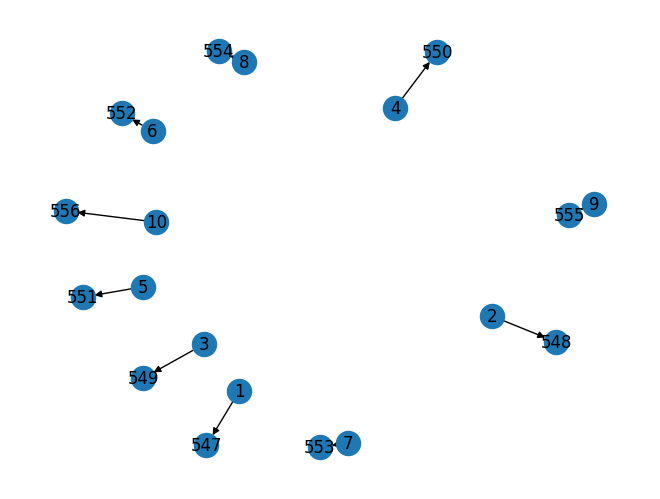

In [7]:
# Crear el grafo
list_Int_nodeChicago = dfChicago['init_node'][0:10].tolist() # Lista de nodos iniciales
list_Ter_nodeChicago = dfChicago['term_node'][0:10].tolist() # Lista de nodos finales
list_weightChicago = dfChicago['length'][0:10].tolist() # Lista de pesos de los arcos

list_edgeChicago = [] # Lista de arcos
for i in range(len(list_Int_nodeChicago)): # Recorremos la lista de nodos iniciales
    varChicago = (list_Int_nodeChicago[i], list_Ter_nodeChicago[i]) # Creamos una tupla con los nodos iniciales y finales
    list_edgeChicago.append(varChicago) # Añadimos la tupla a la lista de arcos

GChicago = nx.DiGraph() # Creamos el grafo
GChicago.add_nodes_from(list_Int_nodeChicago) # Añadimos los nodos iniciales al grafo
for i in range(len(list_weightChicago)): # Recorremos la lista de pesos de los arcos
    GChicago.add_edges_from(list_edgeChicago, weight=list_weightChicago[i]) # Añadimos los arcos al grafo

nx.draw(GChicago, with_labels=True) #dibujamos el grafo 


{(1, 547): Text(-0.6338107732028602, 0.07034168318023012, '0.86267'),
 (2, 548): Text(-0.5051970314607138, 0.6383699356713127, '0.86267'),
 (3, 549): Text(0.15688415102275508, 0.725625866115259, '0.86267'),
 (4, 550): Text(-0.6975763128374385, -0.27652230518262605, '0.86267'),
 (5, 551): Text(0.22745655571278264, -0.9330178263391247, '0.86267'),
 (6, 552): Text(0.806445677803169, 0.4139317094400108, '0.86267'),
 (7, 553): Text(-0.4559808563387273, -0.6306411973289419, '0.86267'),
 (8, 554): Text(0.7184272890357695, 0.08445133602541469, '0.86267'),
 (9, 555): Text(0.5312811419111282, -0.7915276826998707, '0.86267'),
 (10, 556): Text(-0.14792984164586476, 0.698988481118336, '0.86267')}

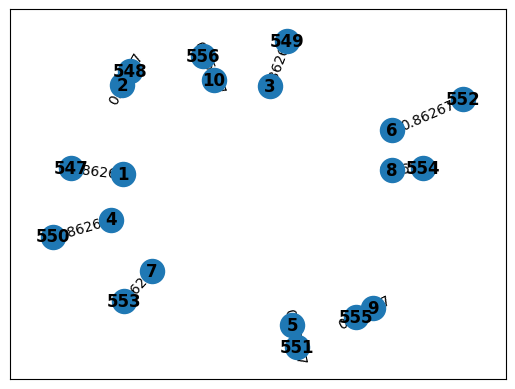

In [9]:
# Método para crear el grafo
posChicago = nx.spring_layout(GChicago)  # Posicionamiento del grafo
weight_labelsChicago = nx.get_edge_attributes(GChicago, 'weight')  # Obtenemos los pesos de los arcos para poder mostrarlos y calcular el coste total de una ruta
nx.draw_networkx(GChicago, posChicago, with_labels=True, font_weight='bold')  # Dibujamos el grafo para visualizarlo
labelsChicago = nx.get_edge_attributes(GChicago, 'weight')  # Obtenemos los pesos de los arcos para mostrarlos en el grafo dibujado
nx.draw_networkx_edge_labels(GChicago, posChicago, edge_labels=labelsChicago)  # Dibujamos los pesos de los arcos en el grafo dibujado
nx.draw_networkx_edge_labels(GChicago, posChicago, edge_labels=weight_labelsChicago)  # Dibujamos los pesos de los arcos en el grafo dibujado# Mostramos el grafo dibujado


# **Segunda ciudad: Berlin Center**

In [10]:
dfBerlin = pd.read_excel('berlin-center_net.xlsx', sheet_name='berlin-center_net')
dfBerlin.head()

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,;
0,1,11000,9999990000000000,0.0,0.0,0.0,4000000,0.0,0.0,0,;
1,1,11007,9999990000000000,0.0,0.0,0.0,4000000,0.0,0.0,0,;
2,1,11704,9999990000000000,0.0,0.0,0.0,4000000,0.0,0.0,0,;
3,1,11708,9999990000000000,0.0,0.0,0.0,4000000,0.0,0.0,0,;
4,1,11717,9999990000000000,0.0,0.0,0.0,4000000,0.0,0.0,0,;


In [11]:
dfBerlin.shape

(28376, 11)

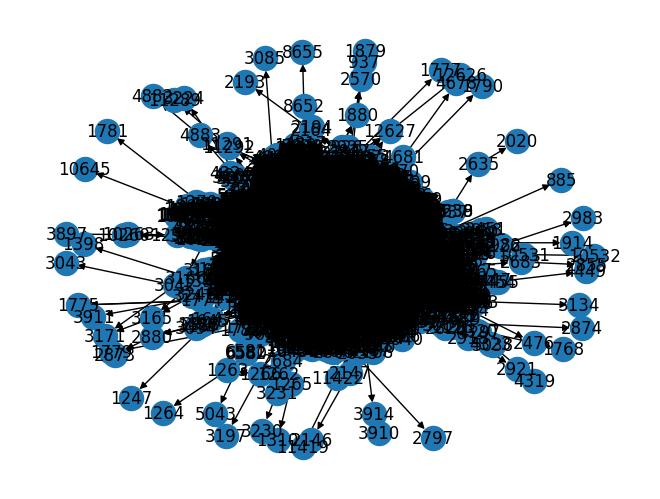

In [12]:
#metodo para crear el grafo
list_Int_nodeBerlin = dfBerlin['init_node'].tolist() #lista de nodos iniciales 
list_Ter_nodeBerlin = dfBerlin['term_node'].tolist() #lista de nodos finales
list_weigthBerlin=dfBerlin['length'].tolist() #lista de pesos de los arcos 
#los pesos sirven para calcular el coste de los arcos osea el coste de pasar de un nodo a otro para asi poder calcular el coste total de una ruta

list_edgeBerlin=[] #lista de arcos 
for i in range(len(list_Int_nodeBerlin)): #recorremos la lista de nodos iniciales
  varBerlin=(list_Int_nodeBerlin[i],list_Ter_nodeBerlin[i]) #creamos una tupla con los nodos iniciales y finales
  list_edgeBerlin.append(varBerlin) #añadimos la tupla a la lista de arcos 


GBerlin = nx.DiGraph() #creamos el grafo 
GBerlin.add_nodes_from(list_Int_nodeBerlin) #añadimos los nodos iniciales al grafo
for i in range(len(list_weigthBerlin)): #recorremos la lista de pesos de los arcos 
  GBerlin.add_edges_from(list_edgeBerlin, weigth=list_weigthBerlin[i]) #añadimos los arcos al grafo 

nx.draw(GBerlin, with_labels=True) #dibujamos el grafo 

In [ ]:
# Calcular la centralidad de intermediación de cada nodo
betweenness_dict = nx.betweenness_centrality(GBerlin)

# Ordenar los nodos por su centralidad de intermediación
sorted_nodes = sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True)

# Mostrar los 10 nodos con mayor centralidad de intermediación
for node in sorted_nodes[:1000]:
    print("Nodo:", node[0], "- Centralidad de intermediación:", node[1])

In [ ]:
import matplotlib.pyplot as plt

# Calcular la distribución de grado de la red
degree_sequence = [d for n, d in GBerlin.degree()]
degree_count = nx.degree_histogram(GBerlin)

# Graficar la distribución de grado
plt.plot(degree_count, 'b-', marker='o')
plt.title("Distribución de grado")
plt.xlabel("Grado")
plt.ylabel("Número de nodos")
plt.show()


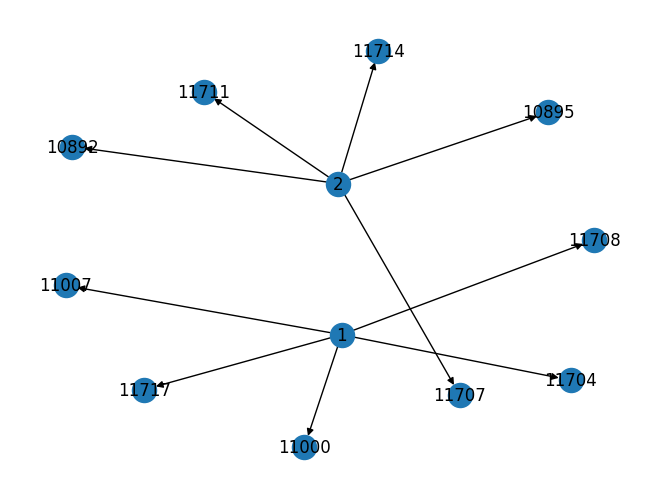

In [23]:
#metodo para crear el grafo
list_Int_nodeBerlin = dfBerlin['init_node'][0:10].tolist() #lista de nodos iniciales 
list_Ter_nodeBerlin = dfBerlin['term_node'][0:10].tolist() #lista de nodos finales
list_weigthBerlin=dfBerlin['length'][0:10].tolist() #lista de pesos de los arcos 
#los pesos sirven para calcular el coste de los arcos osea el coste de pasar de un nodo a otro para asi poder calcular el coste total de una ruta

list_edgeBerlin=[] #lista de arcos 
for i in range(len(list_Int_nodeBerlin)): #recorremos la lista de nodos iniciales
  varBerlin=(list_Int_nodeBerlin[i],list_Ter_nodeBerlin[i]) #creamos una tupla con los nodos iniciales y finales
  list_edgeBerlin.append(varBerlin) #añadimos la tupla a la lista de arcos 


GBerlin = nx.DiGraph() #creamos el grafo 
GBerlin.add_nodes_from(list_Int_nodeBerlin) #añadimos los nodos iniciales al grafo
for i in range(len(list_weigthBerlin)): #recorremos la lista de pesos de los arcos 
  GBerlin.add_edges_from(list_edgeBerlin, weigth=list_weigthBerlin[i]) #añadimos los arcos al grafo 

nx.draw(GBerlin, with_labels=True) #dibujamos el grafo 

In [ ]:
#metodo para calcular el coste total de una ruta
posBerlin = nx.spring_layout(GBerlin)#posicionamiento del grafo 
weight_labelsBerlin = nx.get_edge_attributes(GBerlin,'weight')#obtenemos los pesos de los arcos para poder mostrarlos y asi poder calcular el coste total de una ruta
nx.draw_networkx(GBerlin, posBerlin, with_labels=True, font_weight='bold')#dibujamos el grafo para poder verlo
labelsBerlin = nx.get_edge_attributes(GBerlin, 'weight')#obtenemos los pesos de los arcos para poder mostrarlos en el grafo dibujado 
nx.draw_networkx_edge_labels(GBerlin, posBerlin, edge_labels=labelsBerlin)#dibujamos los pesos de los arcos en el grafo dibujado
nx.draw_networkx_edge_labels(GBerlin, posBerlin,edge_labels=weight_labelsBerlin)#dibujamos los pesos de los arcos en el grafo dibujado

# **Tercera ciudad: Austin**

In [20]:
dfAustin = pd.read_excel('Austin_net.xlsx', sheet_name='Austin_net')
dfAustin.head()


,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type,;
0,1,2,99999,1.794821e+06,4296.0,0.83,5.5,0,0,1,;
1,2,1,99999,1.794821e+06,4296.0,0.83,5.5,0,0,1,;
2,2,43,1201,1.209335e+06,2074286.0,0.83,5.5,0,0,1,;
3,3,4,99999,7.231720e-01,1728.0,0.83,5.5,0,0,1,;
4,3,6572,99999,1.589523e+06,3816.0,0.83,5.5,0,0,1,;


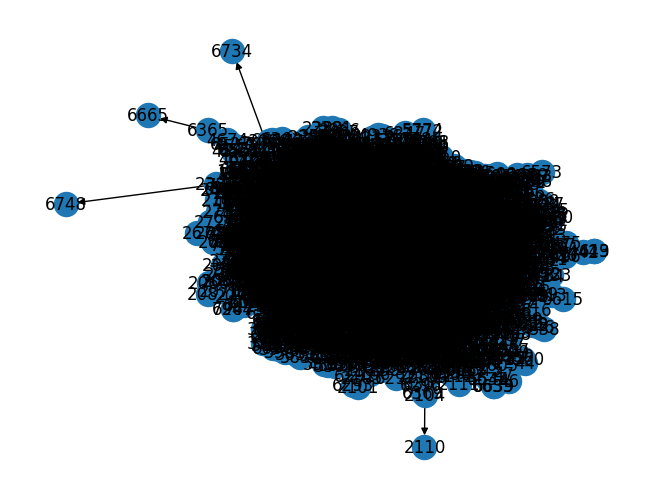

In [22]:
# Método para crear el grafo
list_Int_nodeAustin = dfAustin['init_node'].tolist() #lista de nodos iniciales 
list_Ter_nodeAustin = dfAustin['term_node'].tolist() #lista de nodos finales
list_weigthAustin=dfAustin['length'].tolist() #lista de pesos de los arcos 
#los pesos sirven para calcular el coste de los arcos osea el coste de pasar de un nodo a otro para asi poder calcular el coste total de una ruta

list_edgeAustin=[] #lista de arcos 
for i in range(len(list_Int_nodeAustin)): #recorremos la lista de nodos iniciales
  varAustin=(list_Int_nodeAustin[i],list_Ter_nodeAustin[i]) #creamos una tupla con los nodos iniciales y finales
  list_edgeAustin.append(varAustin) #añadimos la tupla a la lista de arcos 


GAustin = nx.DiGraph() #creamos el grafo 
GAustin.add_nodes_from(list_Int_nodeAustin) #añadimos los nodos iniciales al grafo
for i in range(len(list_weigthAustin)): #recorremos la lista de pesos de los arcos 
  GAustin.add_edges_from(list_edgeAustin, weight=list_weigthAustin[i]) #añadimos los arcos al grafo 

nx.draw(GAustin, with_labels=True) #dibujamos el grafo 


In [ ]:
# Calcular la centralidad de intermediación de cada nodo
betweenness_dict = nx.betweenness_centrality(GAustin)

# Ordenar los nodos por su centralidad de intermediación
sorted_nodes = sorted(betweenness_dict.items(), key=lambda x: x[1], reverse=True)

# Mostrar los 10 nodos con mayor centralidad de intermediación
for node in sorted_nodes[:500]:
    print("Nodo:", node[0], "- Centralidad de intermediación:", node[1])

In [ ]:
import matplotlib.pyplot as plt

# Calcular la distribución de grado de la red
degree_sequence = [d for n, d in GAustin.degree()]
degree_count = nx.degree_histogram(GAustin)

# Graficar la distribución de grado
plt.plot(degree_count, 'b-', marker='o')
plt.title("Distribución de grado")
plt.xlabel("Grado")
plt.ylabel("Número de nodos")
plt.show()


In [ ]:
# Método para crear el grafo
list_Int_nodeAustin = dfAustin['init_node'][0:10].tolist() # Lista de nodos iniciales
list_Ter_nodeAustin = dfAustin['term_node'][0:10].tolist() # Lista de nodos finales
list_weigthAustin = dfAustin['length'][0:10].tolist() # Lista de pesos de los arcos

# Los pesos sirven para calcular el coste de los arcos, es decir, el coste de pasar de un nodo a otro, para poder calcular el coste total de una ruta

list_edgeAustin = [] # Lista de arcos

for i in range(len(list_Int_nodeAustin)): # Recorremos la lista de nodos iniciales
    varAustin = (list_Int_nodeAustin[i], list_Ter_nodeAustin[i]) # Creamos una tupla con los nodos iniciales y finales
    list_edgeAustin.append(varAustin) # Añadimos la tupla a la lista de arcos

GAustin = nx.DiGraph() # Creamos el grafo
GAustin.add_nodes_from(list_Int_nodeAustin) # Añadimos los nodos iniciales al grafo

for i in range(len(list_weigthAustin)): # Recorremos la lista de pesos de los arcos
    GAustin.add_edges_from(list_edgeAustin, weight=list_weigthAustin[i]) # Añadimos los arcos al grafo

nx.draw(GAustin, with_labels=True) # Dibujamos el grafo


In [ ]:
# Método para calcular el coste total de una ruta
posAustin = nx.spring_layout(GAustin)  # Posicionamiento del grafo
weight_labelsAustin = nx.get_edge_attributes(GAustin, 'weight')  # Obtenemos los pesos de los arcos para poder mostrarlos y calcular el coste total de una ruta
nx.draw_networkx(GAustin, posAustin, with_labels=True, font_weight='bold')  # Dibujamos el grafo para visualizarlo
labelsAustin = nx.get_edge_attributes(GAustin, 'weight')  # Obtenemos los pesos de los arcos para mostrarlos en el grafo dibujado
nx.draw_networkx_edge_labels(GAustin, posAustin, edge_labels=labelsAustin)  # Dibujamos los pesos de los arcos en el grafo dibujado
nx.draw_networkx_edge_labels(GAustin, posAustin, edge_labels=weight_labelsAustin)  # Dibujamos los pesos de los arcos en el grafo dibujado


# **RESPUESTAS**

Considerando las diferentes redes de transporte de las ciudades de Chicago, Berlín y Austin, realizaremos un análisis sobre el comportamiento del flujo de tráfico en cada una de ellas. Para este análisis, exploraremos los siguientes aspectos:

1. Identificación de los nodos más importantes en la red: Los nodos más relevantes en la red son aquellos que poseen un mayor peso en comparación con el resto. Estos nodos tienen más conexiones con otros nodos, lo que los convierte en puntos clave para el flujo de tráfico. Al analizar los primeros 25 nodos o más, es posible identificar los nodos más influyentes en cada ciudad. En el caso de Chicago, puede requerir mostrar más nodos para visualizar conexiones significativas.

2. Distribución de la centralidad de la red: En las redes de transporte de Chicago, Berlín y Austin, se observa una distribución descentralizada de la centralidad. Esto significa que no hay un nodo central dominante al que todos los demás nodos estén directamente conectados. En cambio, estos sistemas se caracterizan por una descentralización, lo que permite la existencia de múltiples caminos y rutas alternativas para la comunicación entre nodos.

3. Robustez de la red: Las redes de transporte en estas ciudades se consideran robustas debido a su diseño descentralizado. Incluso si un nodo desaparece o falla, el sistema sigue siendo efectivo ya que existe la posibilidad de conexión entre los nodos a través de rutas alternativas. Esto garantiza que el sistema continúe cumpliendo su función principal, incluso en situaciones de fallos o interrupciones.

4. Comportamiento ante fallos aleatorios y dirigidos: En caso de fallos aleatorios en las redes de transporte de estas ciudades, la robustez del sistema permite que siga funcionando sin resultados negativos significativos. Sin embargo, si se produce una falla dirigida hacia un nodo específico, puede haber una interrupción más significativa en el flujo de tráfico hacia ese destino en particular. A pesar de esto, la estructura descentralizada del sistema ayuda a mitigar el impacto y a mantener la funcionalidad general del sistema.

5. Comparación entre las tres ciudades: Al comparar los resultados de las pruebas realizadas en este análisis, se pueden observar diferencias entre las ciudades de Chicago, Berlin y Austin. En Chicago y Berlín, incluso al mostrar pocos nodos, se puede apreciar rápidamente la existencia de conexiones entre ellos. Por otro lado, en Chicago, es necesario mostrar un mayor número de nodos para empezar a visualizar conexiones entre más de dos nodos y no solo hacia el exterior del grafo. Sin embargo, al imprimir el sistema completo o la gran mayoría de los datos, Chicago se asemeja más a austin, mientras que Berlín tiende a tener nodos más separados y una mayor concentración en la parte central del grafo.

6. Explicación de la autoorganización de los escenarios seleccionados: Al imprimir nodos aleatorios, se puede observar cómo el sistema intenta organizarse de manera que se mantenga la interconexión característica de un sistema descentralizado. A medida que se añaden más nodos, el sistema adquiere la forma completa con todos los nodos, lo cual permite que se cumpla su función sin fallos y mantenga la conectividad deseada en cada ciudad.





